<h1>24 sept</h1>

<h5>Classification Problem</h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("libraries import")


libraries import


<h5>Gathering Data</h5>

In [2]:
dataset_link = "https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv"

In [3]:
df = pd.read_csv(dataset_link)
df.head(15)

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
5,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,26,1180,1,4,1,0,0.0
6,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,47,1276,2,4,2,9,23.0
7,Female,Loyal Customer,Business travel,Business,satisfied,52,2035,5,5,4,4,0.0
8,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,41,853,1,1,2,0,0.0
9,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,20,1061,2,4,2,0,0.0


<h5>Analysis (EDA)</h5>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [5]:
df.duplicated().sum()    # duplicate data   (here amount is very small (172) so we can neglect it or if we do not want it we cant remove it.)

np.int64(172)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum() # duplicate data

np.int64(0)

In [8]:
df.isnull().sum()   # missing records

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [9]:
df[df['Arrival Delay in Minutes'].isnull()]    # the rows which contains the missing data

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
213,Female,Loyal Customer,Business travel,Eco,satisfied,38,109,5,4,5,31,NaN
1124,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,53,1012,4,4,4,38,NaN
1529,Male,Loyal Customer,Business travel,Business,neutral or dissatisfied,39,733,2,2,3,11,NaN
2004,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,26,1035,2,4,2,41,NaN
2108,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,24,417,5,2,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,49,1249,3,4,3,230,NaN
102384,Male,Loyal Customer,Business travel,Eco,neutral or dissatisfied,58,733,3,2,3,55,NaN
102552,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,29,1107,5,5,5,0,NaN
102960,Male,Loyal Customer,Business travel,Eco,satisfied,58,1088,5,5,5,0,NaN


<h5>filling missing records</h5>

In [10]:
# while filling records first see that it is categorical (then mode) or numerical (then mean and median)

In [11]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [12]:
round(df["Arrival Delay in Minutes"].mean(),2)                  # value rounded to two decimal points.

np.float64(15.2)

In [13]:
df['Arrival Delay in Minutes'].fillna(round(df["Arrival Delay in Minutes"].mean(),2),inplace=True)      #  it will fill the missing records with the mean value upto two decimal places.

C:\Users\ashis\AppData\Local\Temp\ipykernel_16880\577892098.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(round(df["Arrival Delay in Minutes"].mean(),2),inplace=True)      #  it will fill the missing records with the mean value upto two decimal places.


In [14]:
df.isnull().sum()   # now there are no missing records

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [15]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [16]:
df['Class'].value_counts()

Class
Business    49555
Eco         46684
Eco Plus     7493
Name: count, dtype: int64

In [17]:
days = list(df['Class'].value_counts().keys())
days

['Business', 'Eco', 'Eco Plus']

In [18]:
values = list(df['Class'].value_counts())
values

[49555, 46684, 7493]

<BarContainer object of 3 artists>

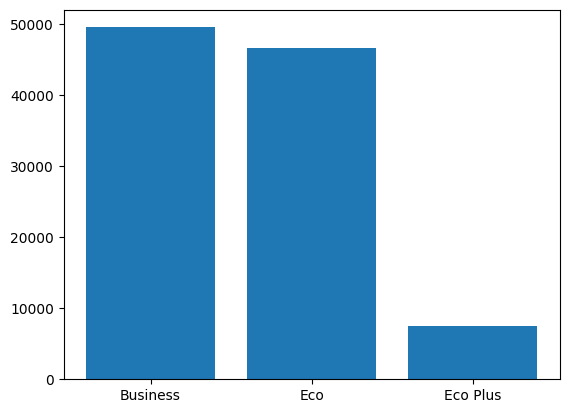

In [19]:
plt.bar(days,values)

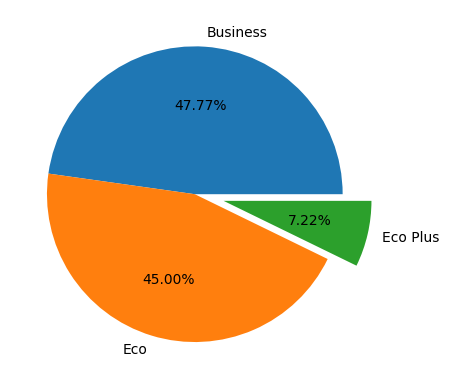

In [20]:
explosion = [0,0,0.2]

plt.pie(values, labels = days, autopct = "%2.2f%%", explode = explosion, wedgeprops = {'ec':'black','ls':''})        # ec directly cant work here so we use wedgeprops={'':''}
plt.show()

In [21]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [22]:
df['Cleanliness'].value_counts()

Cleanliness
4    27123
3    24531
5    22646
2    16116
1    13304
0       12
Name: count, dtype: int64

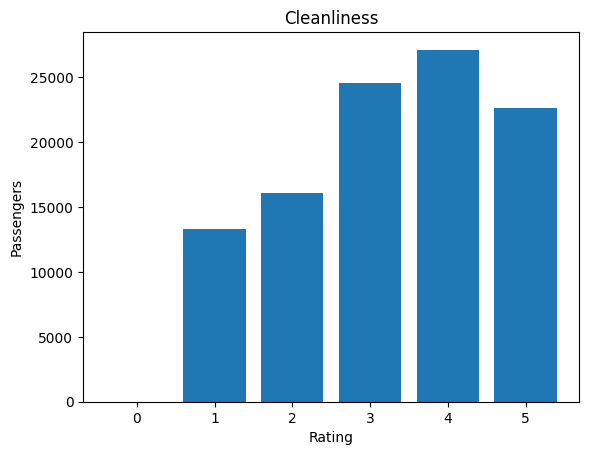

In [23]:
key = list(df['Cleanliness'].value_counts().keys())
valu = list(df['Cleanliness'].value_counts())
plt.bar(key,valu)
plt.title('Cleanliness')
plt.xlabel('Rating')
plt.ylabel('Passengers')
plt.show()


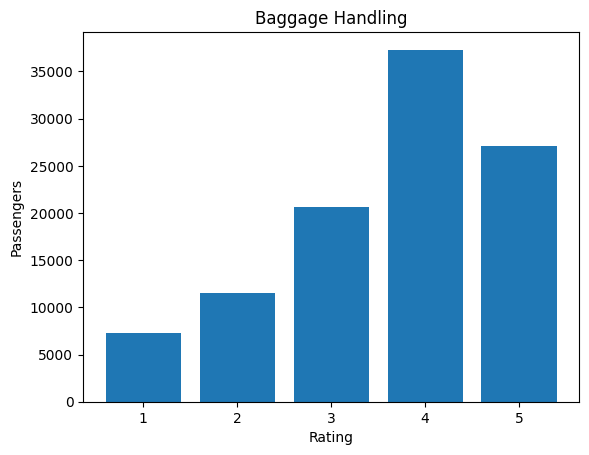

In [24]:
key1 = list(df['Baggage handling'].value_counts().keys())
valu1 = list(df['Baggage handling'].value_counts())
plt.bar(key1,valu1)
plt.title('Baggage Handling')
plt.xlabel('Rating')
plt.ylabel('Passengers')
plt.show()


Text(0, 0.5, 'Passengers')

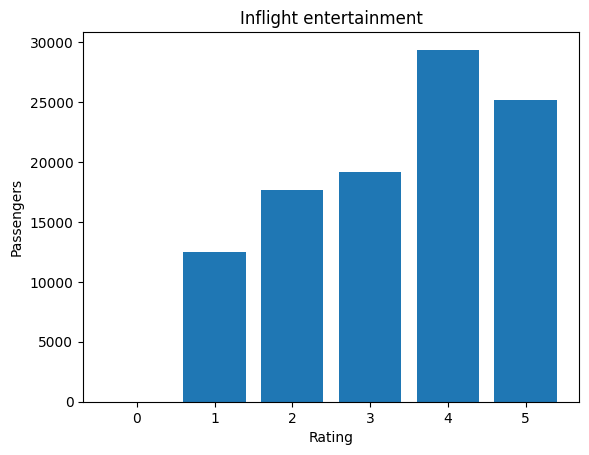

In [25]:
key2 = list(df['Inflight entertainment'].value_counts().keys())
valu2 = list(df['Inflight entertainment'].value_counts())
plt.bar(key2,valu2)
plt.title('Inflight entertainment')
plt.xlabel('Rating')
plt.ylabel('Passengers')

In [26]:
df['Gender'].value_counts()

Gender
Female    52651
Male      51081
Name: count, dtype: int64

In [27]:
df[df['Gender'] == 'Male']

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
6,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,47,1276,2,4,2,9,23.0
9,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,20,1061,2,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103896,Male,Loyal Customer,Business travel,Eco,neutral or dissatisfied,57,867,4,3,4,0,0.0
103898,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,50,1620,2,4,2,0,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0


In [28]:
male = df[df['Gender'] == 'Male']
male

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
6,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,47,1276,2,4,2,9,23.0
9,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,20,1061,2,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103896,Male,Loyal Customer,Business travel,Eco,neutral or dissatisfied,57,867,4,3,4,0,0.0
103898,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,50,1620,2,4,2,0,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0


In [29]:
female = df[df['Gender'] == 'Female']
female

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
5,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,26,1180,1,4,1,0,0.0
7,Female,Loyal Customer,Business travel,Business,satisfied,52,2035,5,5,4,4,0.0
8,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,41,853,1,1,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103893,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,58,296,3,3,1,0,29.0
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,24,1055,1,5,1,13,10.0
103897,Female,Loyal Customer,Business travel,Business,satisfied,60,1599,4,4,4,9,7.0
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0


In [30]:
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42394
disloyal Customer    10257
Name: count, dtype: int64

In [31]:
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42384
disloyal Customer     8697
Name: count, dtype: int64

In [32]:
female['Class'].value_counts()

Class
Business    24873
Eco         23836
Eco Plus     3942
Name: count, dtype: int64

In [33]:
male['Class'].value_counts()

Class
Business    24682
Eco         22848
Eco Plus     3551
Name: count, dtype: int64

<h1>26 sept</h1>

<h4>categorical to numerical value conversion</h4>

In [34]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [35]:
df.dtypes

Gender                         object
Customer Type                  object
Type of Travel                 object
Class                          object
satisfaction                   object
Age                             int64
Flight Distance                 int64
Inflight entertainment          int64
Baggage handling                int64
Cleanliness                     int64
Departure Delay in Minutes      int64
Arrival Delay in Minutes      float64
dtype: object

<h4>onehot encoder representation of features</h4>

In [36]:
pd.get_dummies(df)

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,5,4,5,25,18.0,False,True,True,False,False,True,False,False,True,True,False
1,25,235,1,3,1,1,6.0,False,True,False,True,True,False,True,False,False,True,False
2,26,1142,5,4,5,0,0.0,True,False,True,False,True,False,True,False,False,False,True
3,25,562,2,3,2,11,9.0,True,False,True,False,True,False,True,False,False,True,False
4,61,214,3,4,3,0,0.0,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0.0,True,False,False,True,True,False,False,True,False,True,False
103900,49,2347,5,5,4,0,0.0,False,True,True,False,True,False,True,False,False,False,True
103901,30,1995,4,4,4,7,14.0,False,True,False,True,True,False,True,False,False,True,False
103902,22,1000,1,1,1,0,0.0,True,False,False,True,True,False,False,True,False,True,False


In [37]:
pd.get_dummies(df).astype(int)

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,5,4,5,25,18,0,1,1,0,0,1,0,0,1,1,0
1,25,235,1,3,1,1,6,0,1,0,1,1,0,1,0,0,1,0
2,26,1142,5,4,5,0,0,1,0,1,0,1,0,1,0,0,0,1
3,25,562,2,3,2,11,9,1,0,1,0,1,0,1,0,0,1,0
4,61,214,3,4,3,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,1,0,0,1,1,0,0,1,0,1,0
103900,49,2347,5,5,4,0,0,0,1,1,0,1,0,1,0,0,0,1
103901,30,1995,4,4,4,7,14,0,1,0,1,1,0,1,0,0,1,0
103902,22,1000,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0


In [38]:
df2 = pd.get_dummies(df,drop_first='if binary').astype(int)

In [39]:
df2.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1


In [40]:
df2.dtypes

Age                                int64
Flight Distance                    int64
Inflight entertainment             int64
Baggage handling                   int64
Cleanliness                        int64
Departure Delay in Minutes         int64
Arrival Delay in Minutes           int64
Gender_Male                        int64
Customer Type_disloyal Customer    int64
Type of Travel_Personal Travel     int64
Class_Eco                          int64
Class_Eco Plus                     int64
satisfaction_satisfied             int64
dtype: object

In [41]:
# x (independent variables) , y (dependent variable)
x = df2.drop('satisfaction_satisfied',axis='columns')
y = df2[['satisfaction_satisfied']]

In [42]:
x

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,5,4,5,25,18,1,0,1,0,1
1,25,235,1,3,1,1,6,1,1,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0
3,25,562,2,3,2,11,9,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0
103901,30,1995,4,4,4,7,14,1,1,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0


In [43]:
y

,satisfaction_satisfied
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [46]:
x_train.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
99755,45,3187,4,4,5,1,0,0,0,0,0,0
38794,52,277,1,1,3,11,8,0,0,1,0,0
74060,34,479,5,3,5,19,27,1,0,1,1,0
19664,40,250,1,3,1,20,9,0,0,0,1,0
88106,29,1504,5,2,5,0,0,0,0,0,0,0


In [47]:
x_test.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
75863,23,928,2,4,2,11,17,0,1,0,1,0
40803,54,907,5,5,4,0,19,0,0,0,1,0
17421,14,862,5,5,5,47,75,1,0,1,1,0
17408,8,236,5,1,5,6,1,0,0,1,1,0
14879,19,746,5,3,5,0,4,1,0,1,1,0


In [48]:
y_train.head()

,satisfaction_satisfied
99755,1
38794,0
74060,0
19664,0
88106,1


In [49]:
y_test.head()

,satisfaction_satisfied
75863,0
40803,1
17421,0
17408,0
14879,0


<h4>Training algorithms</h4>

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

#### SVM ==> support vector machine

In [51]:
lgr = LogisticRegression()
dtc = DecisionTreeClassifier()
rdfc = RandomForestClassifier()
knn_cls = KNeighborsClassifier()

print("All classes initiated!")

All classes initiated!


In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
lgr.fit(x_train,y_train)
dtc.fit(x_train,y_train)
rdfc.fit(x_train,y_train)
knn_cls.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
## find out scores of alogos

print("score of logistic regression")
print("training score : ",lgr.score(x_train,y_train)*100)
print("testing score : ",lgr.score(x_test,y_test)*100)
print()

print("score of Decisiontree")
print("training score : ",dtc.score(x_train,y_train)*100)
print("testing score : ",lgr.score(x_test,y_test)*100)
print()

print("score of Random forest")
print("training score : ",rdfc.score(x_train,y_train)*100)
print("testing score : ",rdfc.score(x_test,y_test)*100)
print()

print("score of KNN")
print("training score : ",knn_cls.score(x_train,y_train)*100)
print("testing score : ",knn_cls.score(x_test,y_test)*100)
print()


score of logistic regression
training score :  79.49629451105622
testing score :  78.92225381982936

score of Decisiontree
training score :  99.97107911068265
testing score :  78.92225381982936

score of Random forest
training score :  99.9662589624631
testing score :  86.61011230539356

score of KNN
training score :  78.81424353798879
testing score :  68.19299175784451



In [55]:
# trainingg score and testing score me jiska score difference 5 ya 5 se kam ho to vo best he
# 
# over fit 
# (training score high (91), testing score low (81))
# under fit (training score )
# (training score low , testing store unknown (may be high or low))

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rdf2 = RandomForestClassifier(n_estimators=80,min_samples_leaf=15,min_samples_split=25,max_depth=9)

In [58]:
rdf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=15, min_samples_split=25,
                       n_estimators=80)

In [59]:
print("score of Random forest")
print("training score : ",rdf2.score(x_train,y_train)*100)
print("testing score : ",rdf2.score(x_test,y_test)*100)
print()

score of Random forest
training score :  87.90986322829427
testing score :  87.31382850532607



In [60]:
## prediction

In [61]:
y_test

,satisfaction_satisfied
75863,0
40803,1
17421,0
17408,0
14879,0
...,...
15098,0
80876,1
41719,0
83812,0


In [62]:
lgr_prediction = lgr.predict(x_test)
dtc_prediction = dtc.predict(x_test)
rdfc_prediction = rdfc.predict(x_test)
knn_cls_prediction = knn_cls.predict(x_test)

In [63]:
y_test['lgr_prediction'] = lgr_prediction
y_test['dtc_prediction'] = dtc_prediction
y_test['rdfc_prediction'] = rdfc_prediction
y_test['knn_cls_prediction'] = knn_cls_prediction

In [64]:
y_test

,satisfaction_satisfied,lgr_prediction,dtc_prediction,rdfc_prediction,knn_cls_prediction
75863,0,0,0,0,0
40803,1,0,1,1,0
17421,0,0,0,0,0
17408,0,1,0,0,0
14879,0,0,0,0,0
...,...,...,...,...,...
15098,0,0,0,0,0
80876,1,1,1,1,0
41719,0,0,1,1,1
83812,0,0,1,0,0
